CODE BLOCK: 1


In [1]:
# # Install any required libraries not present in your working environment

# # Needed locally and in colab
# !pip install torchsummary

# # Needed locally
# !conda install -c conda-forge tqdm

In [2]:
# Import necessary modules (external libs)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torchvision import datasets

In [ ]:
# Import user defined modules
from model import Net
from utils import (
    apply_mnist_image_transformations,
    plot_train_test_metrics,
    get_device,
    test,
    train
)

CODE BLOCK: 2


In [3]:
# Functionality to check cuda support and create device is now moved to utils.py
device_support, device = get_device()
print(f"Device created with {device_support}!")

CUDA Available? True


CODE BLOCK: 3


In [4]:
# Train and test data transformation steps now moved to utils.py as apply_mnist_image_transformations()
train_transforms, test_transforms = apply_mnist_image_transformations()

CODE BLOCK: 4


In [5]:
data_path = "../data"
print(f"Train and test data path: {data_path}")

# Download MNIST dataset and apply transformations
train_data = datasets.MNIST(
    data_path, train=True, download=True, transform=train_transforms
)
test_data = datasets.MNIST(
    data_path, train=False, download=True, transform=test_transforms
)

CODE BLOCK: 5


In [6]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

# Load train and test data using DataLoader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6


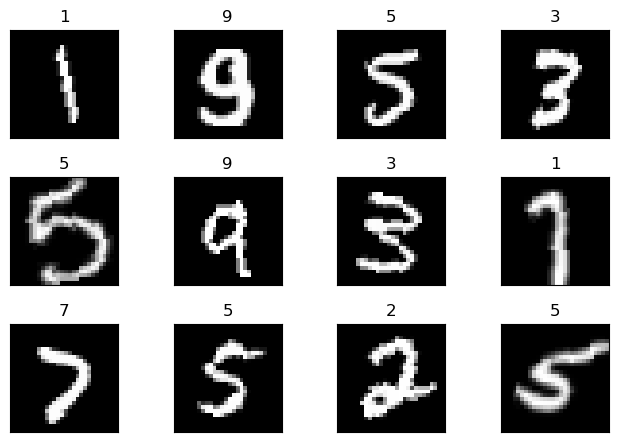

In [7]:
batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

# Display 12 images from the training data
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap="gray")
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

CODE BLOCK: 7


In [8]:
# Net class is imported from model.py

In [9]:
# Send the model to device
model = Net().to(device)
# Print the model summary by specifying the input size
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8


In [10]:
# List to hold losses and accuracy for test and train moved to utils.py

CODE BLOCK: 8


In [11]:
# Function definitions for GetCorrectPredCount(), train() and test() is now imported from moved to utils.py

CODE BLOCK: 9


In [12]:
# Create optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# Specify the loss function
criterion = nn.CrossEntropyLoss()
# Specify the number of epochs
num_epochs = 20

for epoch in range(1, num_epochs + 1):

    if epoch == 1:
        print(f"Batch size: {batch_size}, Total epochs: {num_epochs}")

    # Print the current epoch
    print(f"Epoch {epoch}")
    # Train the model
    train(model, device, train_loader, optimizer, criterion)
    # Test the model
    test(model, device, test_loader, criterion)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4591 Batch_id=117 Accuracy=54.65: 100%|██████████| 118/118 [00:09<00:00, 12.83it/s]


Test set: Average loss: 0.0004, Accuracy: 9366/10000 (93.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1999 Batch_id=117 Accuracy=93.98: 100%|██████████| 118/118 [00:09<00:00, 12.23it/s]


Test set: Average loss: 0.0002, Accuracy: 9705/10000 (97.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0513 Batch_id=117 Accuracy=96.17: 100%|██████████| 118/118 [00:09<00:00, 12.39it/s]


Test set: Average loss: 0.0001, Accuracy: 9797/10000 (97.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0670 Batch_id=117 Accuracy=97.09: 100%|██████████| 118/118 [00:09<00:00, 13.04it/s]


Test set: Average loss: 0.0001, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0672 Batch_id=117 Accuracy=97.54: 100%|██████████| 118/118 [00:09<00:00, 12.64it/s]


Test set: Average loss: 0.0001, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0766 Batch_id=117 Accuracy=97.79: 100%|██████████| 118/118 [00:09<00:00, 12.93it/s]


Test set: Average loss: 0.0001, Accuracy: 9856/10000 (98.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0265 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:09<00:00, 12.90it/s]


Test set: Average loss: 0.0001, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0949 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:09<00:00, 12.88it/s]


Test set: Average loss: 0.0001, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1080 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:09<00:00, 12.21it/s]


Test set: Average loss: 0.0001, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0275 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [00:09<00:00, 12.37it/s]


Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0226 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:09<00:00, 12.22it/s]


Test set: Average loss: 0.0001, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0188 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:09<00:00, 12.55it/s]


Test set: Average loss: 0.0001, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0357 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:09<00:00, 12.31it/s]


Test set: Average loss: 0.0001, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0033 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:09<00:00, 12.30it/s]


Test set: Average loss: 0.0001, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0257 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:09<00:00, 12.89it/s]


Test set: Average loss: 0.0001, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0145 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:09<00:00, 12.98it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0160 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:08<00:00, 13.14it/s]


Test set: Average loss: 0.0000, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0164 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:10<00:00, 11.17it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0022 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [00:09<00:00, 13.00it/s]


Test set: Average loss: 0.0000, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0041 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:08<00:00, 13.18it/s]


Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

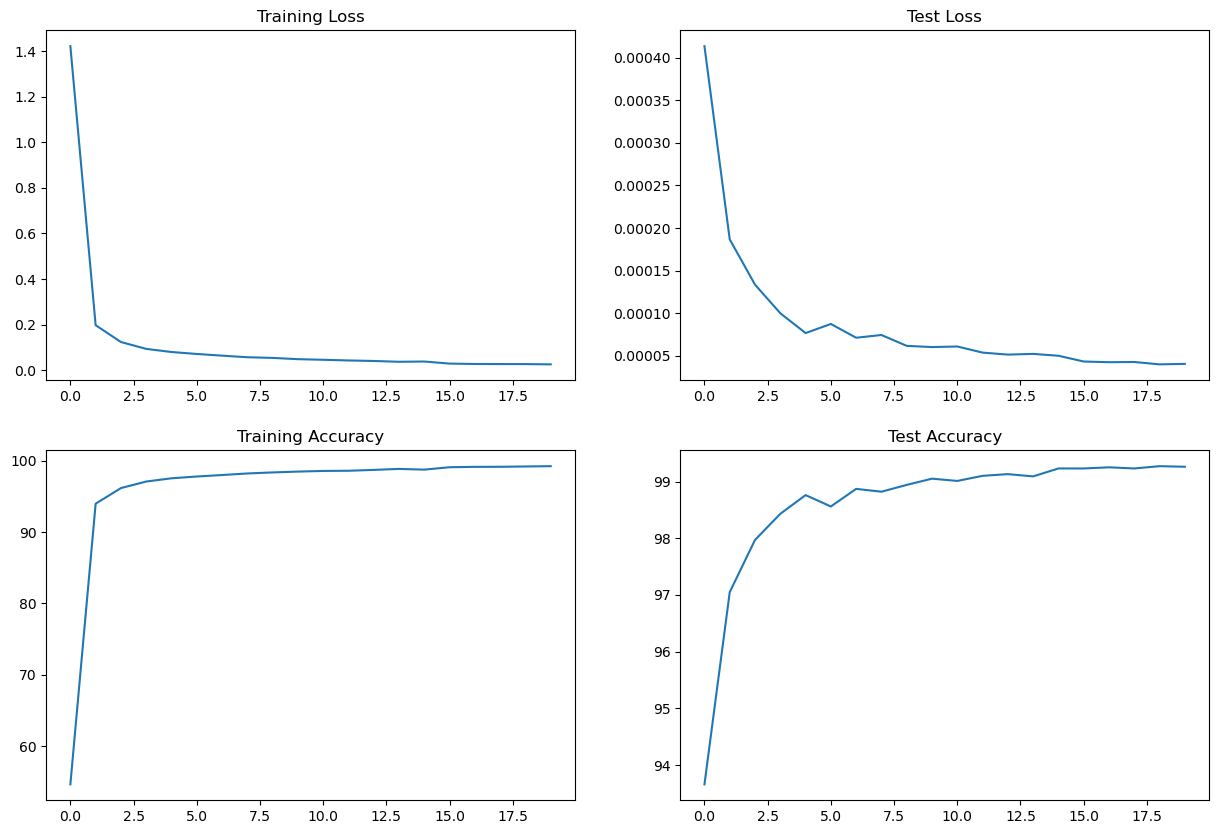

In [13]:
# Plot the accuracy and loss graphs using data and plot_train_test_metrics() from utils.py
fig = plot_train_test_metrics()
plt.show()